In [1]:
import os, glob
import cv2
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

import sklearn
from tensorflow.keras.applications import VGG16

In [2]:
covid_dir = r'D:\datasets\COVID-19_Radiography_Dataset\COVID\images'
normal_dir = r'D:\datasets\COVID-19_Radiography_Dataset\Normal\images'
others_dir = r'D:\datasets\COVID-19_Radiography_Dataset\Viral Pneumonia\images'

In [3]:
os.getcwd()

'C:\\Users\\Siddhartha Devan V\\jupyter ml\\COVID'

In [4]:
os.chdir(r'D:\datasets\COVID-19_Radiography_Dataset\COVID\images')

In [5]:
os.getcwd()

'D:\\datasets\\COVID-19_Radiography_Dataset\\COVID\\images'

In [3]:
covid_paths = glob.glob(os.path.join(covid_dir, '*.png')) 
print('n_covid= ',len(covid_paths))

normal_paths = glob.glob(os.path.join(normal_dir, '*.png'))
print('n_normal = ', len(normal_paths))

others_paths = glob.glob(os.path.join(others_dir, '*.png')) 
print('n_others = ', len(others_paths))

n_covid=  3616
n_normal =  10192
n_others =  1345


In [4]:
normal_paths = np.random.choice(normal_paths, size=3000, replace=False)
print('n_normal = ', len(normal_paths))

covid_paths = np.random.choice(covid_paths, size=3000, replace=False) 
print('n_covid= ',len(covid_paths))

others_paths = np.random.choice(others_paths, size=1500, replace = True) 
print('n_others = ', len(others_paths))

n_normal =  3000
n_covid=  3000
n_others =  1500


In [5]:
# normal_imgs = [cv2.imread(i).resize(224, 224, 3) for i in normal_paths]
# covid_imgs = [cv2.imread(i).resize(224, 224,3) for i in covid_paths]
# other_imgs = [cv2.imread(i).resize(224, 224, 3) for i in others_path]


In [6]:
img = cv2.imread(covid_paths[90])




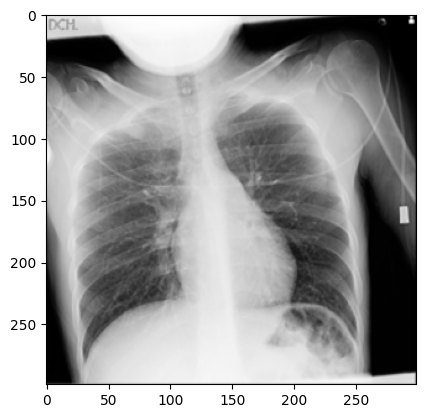

In [7]:
plt.imshow(img, cmap = 'gray')

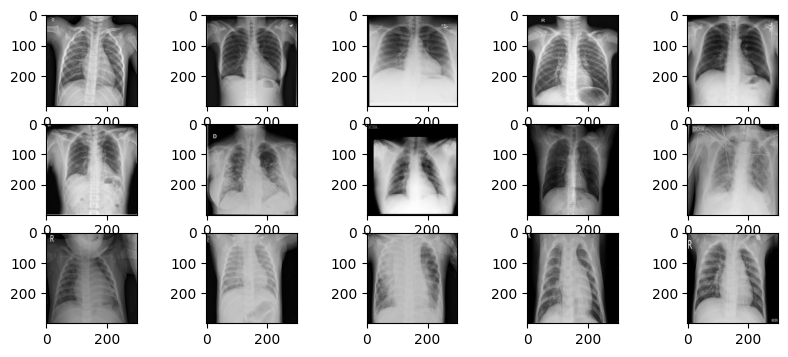

In [8]:
fig, axes = plt.subplots(3, 5, figsize=(10, 4))

for i in range(0,5):
    axes[0,i].imshow(cv2.imread(normal_paths[i]))
    axes[1,i].imshow(cv2.imread(covid_paths[i]))
    axes[2,i].imshow(cv2.imread(others_paths[i]))

In [9]:
normal_imgs = []
for i in normal_paths:
    img = cv2.imread(i)
    img = cv2.resize(img, (224, 224))
    
    normal_imgs.append(img)

In [10]:
covid_imgs = []
for i in covid_paths:
    img = cv2.imread(i)
    img = cv2.resize(img, (224, 224))
    
    covid_imgs.append(img)

In [11]:
other_imgs = []
for i in others_paths:
    img = cv2.imread(i)
    img = cv2.resize(img, (224, 224))
    
    other_imgs.append(img)

In [12]:
X = normal_imgs+covid_imgs+other_imgs
print(len(X))

7500


In [13]:
Y = [0 for i in range(3000)] + [1 for i in range(3000)] + [2 for i in range(1500)]
print(len(Y))

7500


In [14]:
X = np.array(X)
Y = np.array(Y)


In [15]:
X.dtype

dtype('uint8')

In [16]:
print(X[0])

[[[23 23 23]
  [25 25 25]
  [25 25 25]
  ...
  [23 23 23]
  [37 37 37]
  [68 68 68]]

 [[18 18 18]
  [18 18 18]
  [17 17 17]
  ...
  [22 22 22]
  [35 35 35]
  [67 67 67]]

 [[14 14 14]
  [16 16 16]
  [16 16 16]
  ...
  [21 21 21]
  [33 33 33]
  [65 65 65]]

 ...

 [[12 12 12]
  [12 12 12]
  [16 16 16]
  ...
  [26 26 26]
  [26 26 26]
  [26 26 26]]

 [[11 11 11]
  [13 13 13]
  [17 17 17]
  ...
  [27 27 27]
  [27 27 27]
  [26 26 26]]

 [[11 11 11]
  [13 13 13]
  [17 17 17]
  ...
  [25 25 25]
  [26 26 26]
  [25 25 25]]]


<Axes: ylabel='Count'>

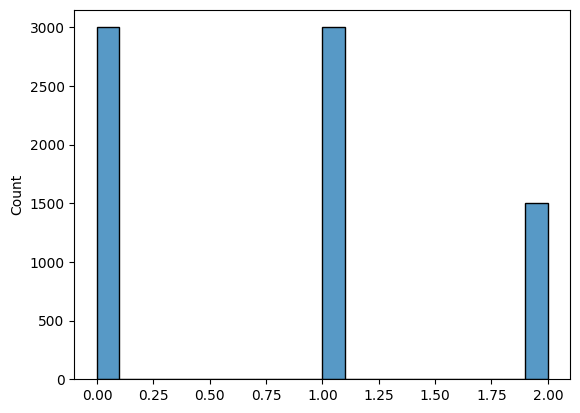

In [17]:
sns.histplot(Y)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [20]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(5625, 224, 224, 3)
(5625,)
(1875, 224, 224, 3)
(1875,)


In [21]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [22]:
print(base_model.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [23]:

for layer in base_model.layers:
    layer.trainable = False


In [24]:
print(base_model.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [25]:
model = models.Sequential([
    base_model,
    layers.Conv2D(512, (5, 5), activation='relu'),
    layers.MaxPooling2D(3,3),
    layers.Flatten(),
    layers.Dense(400, activation='relu'),
    layers.Dense(150, activation = 'relu'),
    layers.Dense(3, activation='softmax')
]
)



model.compile(
    optimizer = 'Adam',
    metrics = 'accuracy',
    loss = 'sparse_categorical_crossentropy'
)


In [26]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [27]:
history = model.fit(X_train, Y_train, epochs = 5, batch_size = 24)

Epoch 1/5
235/235 [==============================] - 113s 412ms/step - loss: 2.4075 - accuracy: 0.8684
Epoch 2/5
235/235 [==============================] - 90s 381ms/step - loss: 0.2712 - accuracy: 0.9545
Epoch 3/5
235/235 [==============================] - 90s 381ms/step - loss: 0.0384 - accuracy: 0.9872
Epoch 4/5
235/235 [==============================] - 90s 381ms/step - loss: 0.0286 - accuracy: 0.9911
Epoch 5/5
235/235 [==============================] - 90s 381ms/step - loss: 0.0527 - accuracy: 0.9854


In [28]:
model.save('vgg16_cov_1')

INFO:tensorflow:Assets written to: vgg16_cov_1\assets


INFO:tensorflow:Assets written to: vgg16_cov_1\assets


In [29]:
read_model = tf.keras.models.load_model('vgg16_cov_1')

In [30]:
model.evaluate(X_test, Y_test)

59/59 [==============================] - 48s 576ms/step - loss: 0.3550 - accuracy: 0.9424


[0.3550057113170624, 0.9423999786376953]

In [37]:
pip install pyyaml h5py

Note: you may need to restart the kernel to use updated packages.


In [38]:
pip show tensorflow

Name: tensorflowNote: you may need to restart the kernel to use updated packages.

Version: 2.10.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\siddhartha devan v\anaconda3\envs\py310\lib\site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, keras-preprocessing, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 


In [41]:
model.save_weights()

In [36]:
print(X_test[0].shape)

(224, 224, 3)


In [37]:
Y_pred = []
for i in range(len(X_test)):
    # print(i)
    
    prediction = model.predict((X_test[i]).reshape(1,224,224,3))
    Y_pred.append(prediction)

1/1 [==============================] - 0s 18ms/step


In [38]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]

In [39]:
print(Y_pred_labels[:10])

[0, 1, 2, 2, 1, 2, 1, 2, 1, 0]


In [40]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_labels))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       741
           1       0.97      0.97      0.97       757
           2       0.99      0.99      0.99       377

    accuracy                           0.97      1875
   macro avg       0.97      0.97      0.97      1875
weighted avg       0.97      0.97      0.97      1875



In [43]:
new_model = tf.keras.models.load_model(r'C:\Users\Siddhartha Devan V\jupyter ml\COVID\vgg16_cov.keras')

ValueError: No model config found in the file at <tensorflow.python.platform.gfile.GFile object at 0x0000020A36D76470>.

In [4]:
new_model = tf.compat.v1.saved_model.utils.convert_saved_model(r'C:\Users\Siddhartha Devan V\jupyter ml\COVID\webapp\covid\flask-backend\vgg16_untrained.h5')

AttributeError: module 'tensorflow.compat.v1.saved_model.utils' has no attribute 'convert_saved_model'

In [44]:
pip install --upgrade tensorflow



SyntaxError: invalid syntax (3875369225.py, line 1)